## Analysis code for 1D-1PL Simulation Study

In [1]:
import os
os.chdir("../..")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from config.constants import SEEDS, DATA_PATH

In [2]:
#NUM_STUDENTS = [50, 75, 100, 150, 200, 250, 300, 350, 400, 450, 500]
NUM_STUDENTS = [50, 75, 100, 150, 200, 250, 300]

sim_p = DATA_PATH["sim"]

In [3]:
def rmse(pred, target):
    return np.sqrt(np.mean((pred - target) ** 2))

def pear(pred, target):
    return np.corrcoef(pred, target)[0, 1]

## Compile metrics

In [4]:
dif_rmse = {}
dif_cor = {}
the_rmse = {}
the_cor = {}

for n in NUM_STUDENTS:
    dif_rmse[n] = []
    dif_cor[n] = []
    the_rmse[n] = []
    the_cor[n] = []

    for s in SEEDS:
        # load results
        suffix = "_n=" + str(n) + "_s=" + str(s) + ".csv"
        dif = pd.read_csv(sim_p + "1d_1pl/difficulty" + suffix )
        dif_est = pd.read_csv(sim_p + "1d_1pl/difficulty_estimate" + suffix)
        the = pd.read_csv(sim_p + "1d_1pl/theta" + suffix )
        the_est = pd.read_csv(sim_p + "1d_1pl/theta_estimate" + suffix)

        dif_rmse[n].append(rmse(-dif_est["x"].values, dif["difficulty"].values))
        dif_cor[n].append(pear(-dif_est["x"].values, dif["difficulty"].values))
        the_rmse[n].append(rmse(the_est["x"].values, the["theta"].values))
        the_cor[n].append(pear(the_est["x"].values, the["theta"].values))

### Create Plots

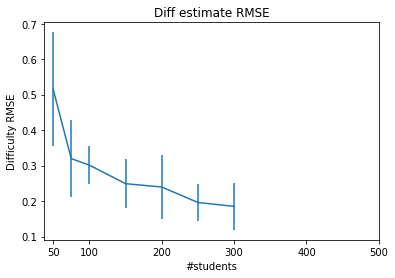

In [5]:
# difficulty rmse
means = [np.mean(dif_rmse[n]) for n in NUM_STUDENTS]
stds = [np.std(dif_rmse[n]) for n in NUM_STUDENTS]
errs = [1.645 * s for s in stds]

plt.errorbar(NUM_STUDENTS, means, errs)
plt.xticks([50, 100, 200, 300, 400, 500])

plt.title("Diff estimate RMSE")
plt.xlabel("#students")
plt.ylabel("Difficulty RMSE")
plt.show()

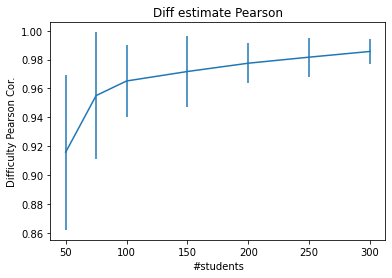

In [6]:
# difficulty pearson
means = [np.mean(dif_cor[n]) for n in NUM_STUDENTS]
stds = [np.std(dif_cor[n]) for n in NUM_STUDENTS]
errs = [1.645 * s for s in stds]

plt.errorbar(NUM_STUDENTS, means, errs)
plt.title("Diff estimate Pearson")
plt.xlabel("#students")
plt.ylabel("Difficulty Pearson Cor.")
plt.show()

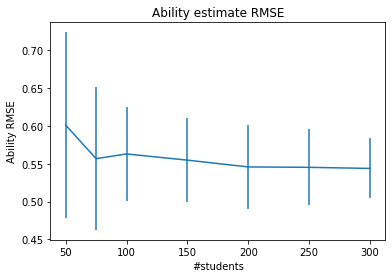

In [7]:
# ability rmse
means = [np.mean(the_rmse[n]) for n in NUM_STUDENTS]
stds = [np.std(the_rmse[n]) for n in NUM_STUDENTS]
errs = [1.96 * s for s in stds]

plt.errorbar(NUM_STUDENTS, means, errs)
plt.title("Ability estimate RMSE")
plt.xlabel("#students")
plt.ylabel("Ability RMSE")
plt.show()

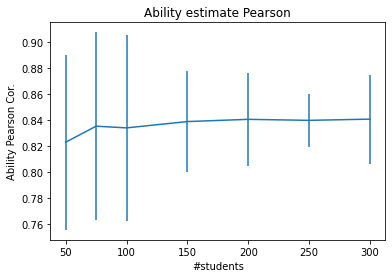

In [8]:
# ability pearson
means = [np.mean(the_cor[n]) for n in NUM_STUDENTS]
stds = [np.std(the_cor[n]) for n in NUM_STUDENTS]
errs = [1.96 * s for s in stds]

plt.errorbar(NUM_STUDENTS, means, errs)
plt.title("Ability estimate Pearson")
plt.xlabel("#students")
plt.ylabel("Ability Pearson Cor.")
plt.show()

## Difficulty rmse/correlation plot

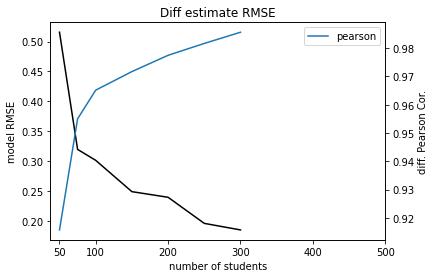

In [9]:
# difficulty rmse
rmse_means = [np.mean(dif_rmse[n]) for n in NUM_STUDENTS]
rmse_stds = [np.std(dif_rmse[n]) for n in NUM_STUDENTS]
rmse_errs = [1.645 * s for s in stds]

# difficulty pearson correlation
cor_means = [np.mean(dif_cor[n]) for n in NUM_STUDENTS]
cor_stds = [np.std(dif_cor[n]) for n in NUM_STUDENTS]
cor_errs = [1.645 * s for s in stds]
cor_errs = [[cor_errs[i], min(cor_errs[i], 1 - cor_means[i])] for i in range(len(NUM_STUDENTS)) ]
cor_errs = np.array(cor_errs).T

# RMSE plot
fig, ax1 = plt.subplots() 
ax1.set_xlabel('number of students') 
ax1.set_ylabel('model RMSE')
# plt1 = ax1.errorbar(NUM_STUDENTS, rmse_means, rmse_stds, label="diff. RMSE", color='black')
plt1 = ax1.plot(NUM_STUDENTS, rmse_means, label="RMSE", color='black')

# Pearson plot
ax2 = ax1.twinx() 
ax2.set_ylabel('diff. Pearson Cor.')
# plt2 = ax2.errorbar(NUM_STUDENTS, cor_means, cor_errs, label="diff. Pearson Cor.")
plt2 = ax2.plot(NUM_STUDENTS, cor_means, label="pearson")

# Add legend
lns = plt1 + plt2
labels = [l.get_label() for l in lns]
plt.legend(lns, labels, loc=0)

plt.xticks([50, 100, 200, 300, 400, 500])
plt.title("Diff estimate RMSE")
plt.legend()
plt.show()

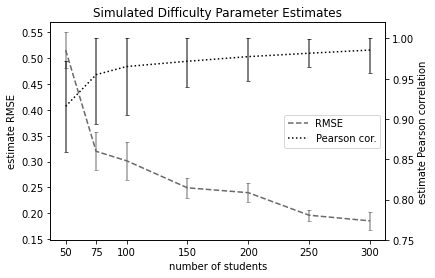

In [10]:
# difficulty rmse
rmse_means = [np.mean(dif_rmse[n]) for n in NUM_STUDENTS]
# rmse_stds = [np.std(dif_rmse[n]) for n in NUM_STUDENTS]
rmse_errs = [1.645 * s for s in stds]
rmse_errs = [1 * s for s in stds]


# difficulty pearson correlation
cor_means = [np.mean(dif_cor[n]) for n in NUM_STUDENTS]
cor_stds = [np.std(dif_cor[n]) for n in NUM_STUDENTS]
cor_errs = [1.645 * s for s in stds]
# cor_errs = [1 * s for s in stds]
cor_errs = [[cor_errs[i], min(cor_errs[i], 1 - cor_means[i])] for i in range(len(NUM_STUDENTS)) ]
cor_errs = np.array(cor_errs).T

# Create Plot
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('number of students') 
ax1.set_ylabel('estimate RMSE', color = 'black') 
ax1.errorbar(NUM_STUDENTS, rmse_means, rmse_errs, color='dimgray', linewidth=0, elinewidth=1.5, capsize=2, alpha=0.65)
ax1.tick_params(axis ='y', labelcolor = 'black') 

# Adding Twin Axes

ax2 = ax1.twinx() 
ax2.set_ylabel('estimate Pearson correlation', color = 'black')
ax2.errorbar(NUM_STUDENTS, cor_means, cor_errs, color='black', linewidth=0, elinewidth=1.5, capsize=2, alpha=0.65)
plot_1 = ax1.plot(NUM_STUDENTS, rmse_means, color = 'dimgray', label='RMSE', linestyle="--") 
plot_2 = ax2.plot(NUM_STUDENTS, cor_means, color = 'black', label = 'Pearson cor.', linestyle="dotted") 
ax2.tick_params(axis ='y', labelcolor = 'black')
ax2.set_ylim(0.75, 1.02)

# Add legends
lns = plot_1 + plot_2
labels = [l.get_label() for l in lns]
plt.legend(lns, labels, loc='center right')
plt.xticks([50, 75, 100, 150, 200, 250, 300])
 
# Show plot
plt.title("Simulated Difficulty Parameter Estimates")
plt.savefig("1d_1pl_simulation.pdf")
plt.show()